## Hard Drive Data

This is an early exploration on the hard drive 
dataset 



In [1]:
## Import the libraries 
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns 

%matplotlib inline 

In [2]:
data = pd.read_csv("data/harddrive.csv")

In [3]:
data.head(10)

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
0,2016-01-01,MJ0351YNG9Z0XA,Hitachi HDS5C3030ALA630,1.482490e-311,0,100,0,135.0,108.0,143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-01,Z305B2QN,ST4000DM000,1.976651e-311,0,113,54551400,NaN,NaN,96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-01,MJ0351YNG9Z7LA,Hitachi HDS5C3030ALA630,1.482490e-311,0,100,0,136.0,104.0,124,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-01,MJ0351YNGABYAA,Hitachi HDS5C3030ALA630,1.482490e-311,0,100,0,136.0,104.0,137,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-01,WD-WMC4N2899475,WDC WD30EFRX,1.482490e-311,0,200,0,NaN,NaN,175,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2016-01-01,PL1321LAG34XWH,Hitachi HDS5C4040ALE630,1.976651e-311,0,100,0,134.0,101.0,131,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2016-01-01,MJ1323YNG1TJ7C,Hitachi HDS5C3030ALA630,1.482490e-311,0,100,0,100.0,0.0,122,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2016-01-01,S300Z6K9,ST4000DM000,1.976651e-311,0,107,13985080,NaN,NaN,97,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2016-01-01,S300Z6K8,ST4000DM000,1.976651e-311,0,116,109242152,NaN,NaN,97,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2016-01-01,Z302PGH8,ST4000DM000,1.976651e-311,0,112,46112000,NaN,NaN,92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
## The number of failures
data.failure.value_counts()

0    3179080
1        215
Name: failure, dtype: int64

There are too few failures - only 215 overall. 
Lets try and see how many failures there are per model 

In [5]:
models = data.model.unique()
for m in models: 
    try: 
        print("The model, ", m, " has ", data[data["model"]==m].failure.value_counts()[1], " failures")
    except KeyError:
        print("The model, ", m, " has no failures")

The model,  Hitachi HDS5C3030ALA630  has  5  failures
The model,  ST4000DM000  has  139  failures
The model,  WDC WD30EFRX  has  6  failures
The model,  Hitachi HDS5C4040ALE630  has  4  failures
The model,  HGST HMS5C4040ALE640  has  2  failures
The model,  HGST HMS5C4040BLE640  has  1  failures
The model,  ST6000DX000  has  2  failures
The model,  Hitachi HDS723030ALA640  has no failures
The model,  Hitachi HDS722020ALA330  has  13  failures
The model,  ST31500541AS  has no failures
The model,  ST4000DX000  has  2  failures
The model,  WDC WD60EFRX  has  1  failures
The model,  WDC WD5000LPVX  has no failures
The model,  HGST HUH728080ALE600  has no failures
The model,  WDC WD1600AAJS  has  2  failures
The model,  ST320LT007  has  15  failures
The model,  ST500LM012 HN  has no failures
The model,  TOSHIBA MD04ABA500V  has  1  failures
The model,  ST9320325AS  has no failures
The model,  TOSHIBA MD04ABA400V  has no failures
The model,  TOSHIBA DT01ACA300  has  1  failures
The model,  H

The model ST4000DM000 has the most number of failures. Lets have a look at it closer 

In [6]:
## Look at all the features
data[data["model"]=="ST4000DM000"].columns

Index(['date', 'serial_number', 'model', 'capacity_bytes', 'failure',
       'smart_1_normalized', 'smart_1_raw', 'smart_2_normalized',
       'smart_2_raw', 'smart_3_normalized', 'smart_3_raw',
       'smart_4_normalized', 'smart_4_raw', 'smart_5_normalized',
       'smart_5_raw', 'smart_7_normalized', 'smart_7_raw',
       'smart_8_normalized', 'smart_8_raw', 'smart_9_normalized',
       'smart_9_raw', 'smart_10_normalized', 'smart_10_raw',
       'smart_11_normalized', 'smart_11_raw', 'smart_12_normalized',
       'smart_12_raw', 'smart_13_normalized', 'smart_13_raw',
       'smart_15_normalized', 'smart_15_raw', 'smart_22_normalized',
       'smart_22_raw', 'smart_183_normalized', 'smart_183_raw',
       'smart_184_normalized', 'smart_184_raw', 'smart_187_normalized',
       'smart_187_raw', 'smart_188_normalized', 'smart_188_raw',
       'smart_189_normalized', 'smart_189_raw', 'smart_190_normalized',
       'smart_190_raw', 'smart_191_normalized', 'smart_191_raw',
       'smart_1

In [7]:
## Lets look at the SMART features - only the raw ones
smart_features_raw = [x for x in data.columns if "smart" in x and "raw" in x]
print("Number of raw smart features: ", len(smart_features_raw))
smart_features_norm = [x for x in data.columns if "smart" in x and "normalized" in x]
print("Number of normed smart features: ", len(smart_features_norm))


Number of raw smart features:  45
Number of normed smart features:  45


In [8]:
type(data.smart_199_raw)
len(data.smart_199_raw), data.shape[0]
print(data.smart_199_raw.shape[0])
data.smart_199_raw.name
data.smart_255_raw.isnull().sum()

3179295


3179295

In [9]:
def howmanynulls(a, df=None):
    if type(a) != list: 
        print("% of null in ", a.name, " is ", a.isnull().sum()/a.shape[0] * 100) 
    elif type(a) == list:
        for a1 in a:
            howmanynulls(df[a1])
    

In [10]:
howmanynulls(data.smart_255_raw)
howmanynulls(smart_features_raw, df=data)

% of null in  smart_255_raw  is  100.0
% of null in  smart_1_raw  is  0.0
% of null in  smart_2_raw  is  60.3963142772
% of null in  smart_3_raw  is  0.0
% of null in  smart_4_raw  is  0.0
% of null in  smart_5_raw  is  0.0
% of null in  smart_7_raw  is  0.0
% of null in  smart_8_raw  is  60.3961255561
% of null in  smart_9_raw  is  0.0
% of null in  smart_10_raw  is  0.0
% of null in  smart_11_raw  is  95.382183786
% of null in  smart_12_raw  is  0.0
% of null in  smart_13_raw  is  99.9998112789
% of null in  smart_15_raw  is  100.0
% of null in  smart_22_raw  is  99.9263987771
% of null in  smart_183_raw  is  43.4007539407
% of null in  smart_184_raw  is  43.1787235849
% of null in  smart_187_raw  is  43.1787235849
% of null in  smart_188_raw  is  0.0
% of null in  smart_189_raw  is  43.1805478888
% of null in  smart_190_raw  is  43.1780316076
% of null in  smart_191_raw  is  41.843899355
% of null in  smart_192_raw  is  0.301356118259
% of null in  smart_193_raw  is  1.34231016625
%

In [11]:
howmanynulls(smart_features_norm, df=data)

% of null in  smart_1_normalized  is  0.0
% of null in  smart_2_normalized  is  60.3963142772
% of null in  smart_3_normalized  is  0.0
% of null in  smart_4_normalized  is  0.0
% of null in  smart_5_normalized  is  0.0
% of null in  smart_7_normalized  is  0.0
% of null in  smart_8_normalized  is  60.3961255561
% of null in  smart_9_normalized  is  0.0
% of null in  smart_10_normalized  is  0.0
% of null in  smart_11_normalized  is  95.382183786
% of null in  smart_12_normalized  is  0.0
% of null in  smart_13_normalized  is  99.9998112789
% of null in  smart_15_normalized  is  100.0
% of null in  smart_22_normalized  is  99.9263987771
% of null in  smart_183_normalized  is  43.4007539407
% of null in  smart_184_normalized  is  43.1787235849
% of null in  smart_187_normalized  is  43.1787235849
% of null in  smart_188_normalized  is  43.1787235849
% of null in  smart_189_normalized  is  43.1805478888
% of null in  smart_190_normalized  is  43.1780316076
% of null in  smart_191_normali

So it turns out some of the features are just null - no matter what type of hard drive it is. 

In which case, maybe we can get rid of those.
So the ones to get rid of are: 
200, 201, 220, 222, 223, 224,225, 226, 250, 251,252, 254, 255, 
195, 22, 11



In [12]:
for i in [200, 201, 220, 222, 223, 224,225, 226, 250, 251,252, 254, 255, 195, 22, 11]:
    try:
        smart_features_raw.remove('smart_'+str(i)+'_raw')
    except ValueError: 
        print("Index not found: ", i)
    


In [13]:
smart_features_raw

['smart_1_raw',
 'smart_2_raw',
 'smart_3_raw',
 'smart_4_raw',
 'smart_5_raw',
 'smart_7_raw',
 'smart_8_raw',
 'smart_9_raw',
 'smart_10_raw',
 'smart_12_raw',
 'smart_13_raw',
 'smart_15_raw',
 'smart_183_raw',
 'smart_184_raw',
 'smart_187_raw',
 'smart_188_raw',
 'smart_189_raw',
 'smart_190_raw',
 'smart_191_raw',
 'smart_192_raw',
 'smart_193_raw',
 'smart_194_raw',
 'smart_196_raw',
 'smart_197_raw',
 'smart_198_raw',
 'smart_199_raw',
 'smart_240_raw',
 'smart_241_raw',
 'smart_242_raw']

In [14]:
def mmm(a, df=None):
    if type(a) != list:
        print("For ", a.name, "mean: ", str(a.mean()), " median: ", str(a.median()), " mode: ", str(a.mode()))
    else:
        for a1 in a:
            mmm(df[a1])

# To do 


## Possibilities 

1. Survival model analysis: 
    1. Make a time-series predictions for each of the features 
    2. Build a survival model,
            a. Based on the simplest features, the time survived and the status 
            b. Adding covariates into the survival model and observing their effects
    3. Based on the time series predictions of the covariates, add them to the survival model and show what difference it makes     

2. Anomaly detection: 
    1. Select a set of serial numbers for a model and estimate the 'mean' distribution of each feature
    2. Identify anomalies for similar serial numbers based on the mean distribution. 

Lets restrict the data to only the ST4000DM000 model. 
Also lets us restrict the data to those serial numbers that appear most often. 

In [24]:
data = data[data["model"]=="ST4000DM000"]

(array([  3.50000000e+01,   3.70000000e+01,   1.60000000e+01,
          9.00000000e+01,   1.57000000e+02,   5.85400000e+03,
          2.70000000e+01,   2.50000000e+01,   2.30000000e+01,
          2.87930000e+04]),
 array([  1. ,   6.1,  11.2,  16.3,  21.4,  26.5,  31.6,  36.7,  41.8,
         46.9,  52. ]),
 <a list of 10 Patch objects>)

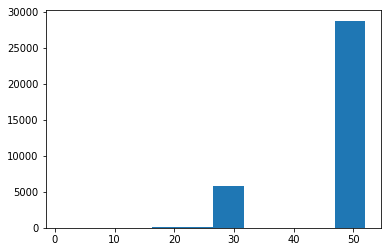

In [25]:
plt.hist(data.serial_number.value_counts().values, bins=10)

We see that the certain serial numbers are repeated a few times. There is a peak are a few serial numbers that appear ~30 times, but that would still not be enough to make a time series model. 

From that perspective, lets take only those serial numbers that have 52 entries in the data table. 

In [26]:
data = data[data.groupby('serial_number')['serial_number'].transform('size') == 52]

In [27]:
data.serial_number.unique()

array(['Z305B2QN', 'S300Z6K9', 'S300Z6K8', ..., 'Z301EVVA', 'Z3041KPQ',
       'S300YQMQ'], dtype=object)

In [31]:
len(data.serial_number.unique())

28727

Lets find the unique 4-character serial_numbers

In [28]:
sn_unique = []
for sn in data.serial_number.unique():
    if sn[:4] in sn_unique:
        continue
    else:
        sn_unique.append(sn[:3])

In [29]:
sn_unique

['Z305', 'S300', 'Z302', 'Z304', 'Z300', 'S301', 'Z301', 'W300', 'Z303']

In [42]:
sorted(round(data[data.serial_number.str.contains('^Z304N')].smart_9_raw/24.).unique())

[17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 108.0,
 109.0,
 110.0,
 111.0,
 112.0,
 113.0,
 114.0,
 115.0,
 116.0,
 117.0,
 118.0,
 119.0,
 120.0,
 121.0,
 122.0,
 123.0,
 124.0,
 125.0,
 126.0,
 127.0,
 128.0,
 129.0,
 130.0,
 131.0,
 132.0,
 133.0,
 134.0,
 135.0,
 136.0,
 137.0,
 138.0,
 139.0,
 140.0,
 141.0,
 142.0]

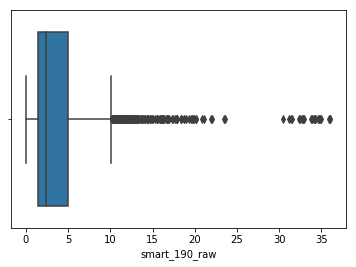

In [23]:
sns.boxplot(data[data.serial_number.str.contains('^S300')].groupby("serial_number").smart_190_raw.var())

## 1. Survival mode analysis

It is not really possible, because the number of entries for the failures are too few. 
Take time and explain it here later. 
